Data Mining Project:
Aaron, Sami, Wicky

How to get Rich? Or not?.....

Algorithms:
1. Categorical Prediction --> Naive Bayes
2. Clustering Algorithm   --> K-Means Clustering/Hierarchial Clustering
3. Continuous Values      --> Linear Regression/Random Forest

In [63]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [64]:
#imports dataset
data = pd.read_csv('adult.csv')
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [65]:
# Explicitly defined columns because the csv file didn't have column names
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-Num', 'Maritial-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-Gain', 'Capital-Loss', 'Hours-Per-Week', 'Native-Country', 'Income']
data.head()

,Age,Workclass,Fnlwgt,Education,Education-Num,Maritial-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [66]:
#Data PreProcessing Steps:
# Outliers
# Missing Data
# Duplicate????

#print("There are no Null/Missing Values")
data.isnull().sum()
data

,Age,Workclass,Fnlwgt,Education,Education-Num,Maritial-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [67]:
#This changes the obj_data into numerical by using the labelEncoder (maybe leave in maybe take out?)
obj_data = data.select_dtypes(include=['object']).copy()
int_data = data.select_dtypes(include=['int64']).copy()
df_enc = obj_data.apply(preprocessing.LabelEncoder().fit_transform)


df = df_enc.merge(int_data, left_index=True, right_index=True)
#df.head()
#int_data.head()
df

,Workclass,Education,Maritial-Status,Occupation,Relationship,Race,Sex,Native-Country,Income,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
0,6,9,2,4,0,4,1,39,0,50,83311,13,0,0,13
1,4,11,0,6,1,4,1,39,0,38,215646,9,0,0,40
2,4,1,2,6,0,2,1,39,0,53,234721,7,0,0,40
3,4,9,2,10,5,2,0,5,0,28,338409,13,0,0,40
4,4,12,2,4,5,4,0,39,0,37,284582,14,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,4,7,2,13,5,4,0,39,0,27,257302,12,0,0,38
32556,4,11,2,7,0,4,1,39,1,40,154374,9,0,0,40
32557,4,11,6,1,4,4,0,39,0,58,151910,9,0,0,40
32558,4,11,4,1,3,4,1,39,0,22,201490,9,0,0,20


In [68]:
# Need to find and remove outliers from the dataset
#this doesn't work atm -->
df.describe()

,Workclass,Education,Maritial-Status,Occupation,Relationship,Race,Sex,Native-Country,Income,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,3.868796,10.298249,2.611794,6.572912,1.446376,3.665848,0.669195,36.718796,0.240817,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,1.455879,3.870317,1.506225,4.228809,1.606794,0.848817,0.470510,7.823892,0.427586,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,39.000000,0.000000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,4.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,39.000000,0.000000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,39.000000,0.000000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,8.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41.000000,1.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [69]:
#finding the interquartile range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Workclass               0.0
Education               3.0
Maritial-Status         2.0
Occupation              7.0
Relationship            3.0
Race                    0.0
Sex                     1.0
Native-Country          0.0
Income                  0.0
Age                    20.0
Fnlwgt             119223.0
Education-Num           3.0
Capital-Gain            0.0
Capital-Loss            0.0
Hours-Per-Week          5.0
dtype: float64


In [70]:
#the values that are 'True' represent the presence of the outlier
print(df < (Q1 - 1.5 * IQR)) or (df > (Q3 + 1.5 * IQR))

       Workclass  Education  Maritial-Status  Occupation  Relationship   Race  \
0          False      False            False       False         False  False   
1          False      False            False       False         False  False   
2          False       True            False       False         False   True   
3          False      False            False       False         False   True   
4          False      False            False       False         False  False   
...          ...        ...              ...         ...           ...    ...   
32555      False      False            False       False         False  False   
32556      False      False            False       False         False  False   
32557      False      False            False       False         False  False   
32558      False      False            False       False         False  False   
32559      False      False            False       False         False  False   

         Sex  Native-Countr

,Workclass,Education,Maritial-Status,Occupation,Relationship,Race,Sex,Native-Country,Income,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


I think we still need some kind of a box plot here or something??? what do you guys think?

In [71]:
#multiple regression

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

,Workclass,Education,Maritial-Status,Occupation,Relationship,Race,Sex,Native-Country,Income,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
Workclass,1.000000,0.023537,-0.064798,0.255004,-0.090449,0.049720,0.095942,-0.007710,0.051645,0.003786,-0.016587,0.052015,0.033828,0.012231,0.138974
Education,0.023537,1.000000,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.064291,0.079311,-0.010508,-0.028156,0.359172,0.030047,0.016744,0.055510
Maritial-Status,-0.064798,-0.038398,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.023827,-0.199295,-0.266292,0.028184,-0.069338,-0.043398,-0.034182,-0.190521
Occupation,0.255004,-0.021274,-0.009617,1.000000,-0.075620,0.006779,0.080328,-0.012532,0.075448,-0.020946,0.001554,0.109748,0.025511,0.017979,0.080384
Relationship,-0.090449,-0.010879,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.005504,-0.250924,-0.263698,0.008922,-0.094145,-0.057918,-0.061064,-0.248975
Race,0.049720,0.014135,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.137849,0.071853,0.028718,-0.021278,0.031825,0.011143,0.018902,0.041910
Sex,0.095942,-0.027349,-0.129337,0.080328,-0.582453,0.087197,1.000000,-0.008125,0.215995,0.088832,0.026882,0.012256,0.048477,0.045572,0.229312
Native-Country,-0.007710,0.064291,-0.023827,-0.012532,-0.005504,0.137849,-0.008125,1.000000,0.015845,-0.001151,-0.051957,0.050831,-0.001984,0.000420,-0.002671
Income,0.051645,0.079311,-0.199295,0.075448,-0.250924,0.071853,0.215995,0.015845,1.000000,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690
Age,0.003786,-0.010508,-0.266292,-0.020946,-0.263698,0.028718,0.088832,-0.001151,0.234039,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756


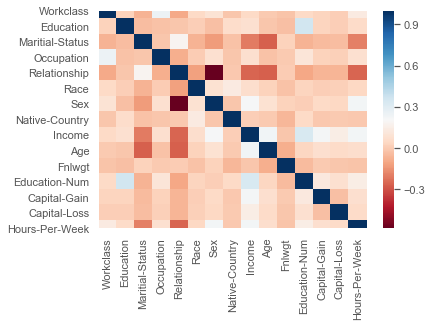

In [73]:
# calculate the correlation matrix
corr = df.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [74]:
# get the summary
df.describe()

,Workclass,Education,Maritial-Status,Occupation,Relationship,Race,Sex,Native-Country,Income,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,3.868796,10.298249,2.611794,6.572912,1.446376,3.665848,0.669195,36.718796,0.240817,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,1.455879,3.870317,1.506225,4.228809,1.606794,0.848817,0.470510,7.823892,0.427586,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,39.000000,0.000000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,4.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,39.000000,0.000000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,39.000000,0.000000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,8.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41.000000,1.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [75]:
#building testing and training sets

from sklearn.model_selection import train_test_split

X = df.drop('Income', axis = 1)
Y = df[['Income']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]
print("The intercept for our model is {:.4}".format(intercept))

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -0.5986
The Coefficient for Workclass is -0.0018
The Coefficient for Education is -0.0037
The Coefficient for Maritial-Status is -0.023
The Coefficient for Occupation is 0.0016
The Coefficient for Relationship is -0.017
The Coefficient for Race is 0.014
The Coefficient for Sex is 0.1
The Coefficient for Native-Country is 0.00011
The Coefficient for Age is 0.0047
The Coefficient for Fnlwgt is 7.1e-08
The Coefficient for Education-Num is 0.047
The Coefficient for Capital-Gain is 9.2e-06
The Coefficient for Capital-Loss is 0.00011
The Coefficient for Hours-Per-Week is 0.0036


In [77]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[0.31520635],
       [0.26287109],
       [0.12807033],
       [0.22870581],
       [0.28846352]])

In [78]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.133
MAE 0.291
RMSE 0.364


In [79]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))


R2: 0.26


In [80]:
# Naive Bayes Implementation
df
df_target = df["Income"]
df_features = df.drop(columns = ["Income"])

In [81]:

#Alternate way to do Naive Byes
df.columns
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target)
model = GaussianNB()
model.fit(X_train, y_train)
target_pred = model.predict(X_test)

count = 0

for i in target_pred:
    count = count + 1
print("# of items in target_pred: ", count)

#not 100% about these results, need to look more into them
# I think it might be trying to predict every row in the dataset or something similar
accuracy = accuracy_score(y_test, target_pred)*100
print("Accuracy of Naive Bayes predictions: ", accuracy)

# of items in target_pred:  8140
Accuracy of Naive Bayes predictions:  79.66830466830467


In [82]:
mat = confusion_matrix(target_pred, y_test)
names = np.unqiue(pred)
sns.heatmap(mat, square=True, annot = True, fmt = 'd', cbar = False, xticklabels = names, yticklabels = names)
plt.xlabel('X')
plt.xlabel('Predicted')

AttributeError: module 'numpy' has no attribute 'unqiue'

### K-Means Clustering: 

In [83]:
# Required libraies already loaded
# plot styling 
import seaborn as sns; sns.set()
%matplotlib inline

plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [84]:
len(df) # number of rows

32560

In [85]:
df.mean()

Workclass               3.868796
Education              10.298249
Maritial-Status         2.611794
Occupation              6.572912
Relationship            1.446376
Race                    3.665848
Sex                     0.669195
Native-Country         36.718796
Income                  0.240817
Age                    38.581634
Fnlwgt             189781.814373
Education-Num          10.080590
Capital-Gain         1077.615172
Capital-Loss           87.306511
Hours-Per-Week         40.437469
dtype: float64

In [86]:
df.var()

Workclass          2.119583e+00
Education          1.497935e+01
Maritial-Status    2.268714e+00
Occupation         1.788283e+01
Relationship       2.581786e+00
Race               7.204897e-01
Sex                2.213797e-01
Native-Country     6.121328e+01
Income             1.828298e-01
Age                1.860671e+02
Fnlwgt             1.114075e+10
Education-Num      6.618831e+00
Capital-Gain       5.454418e+07
Capital-Loss       1.623817e+05
Hours-Per-Week     1.524637e+02
dtype: float64

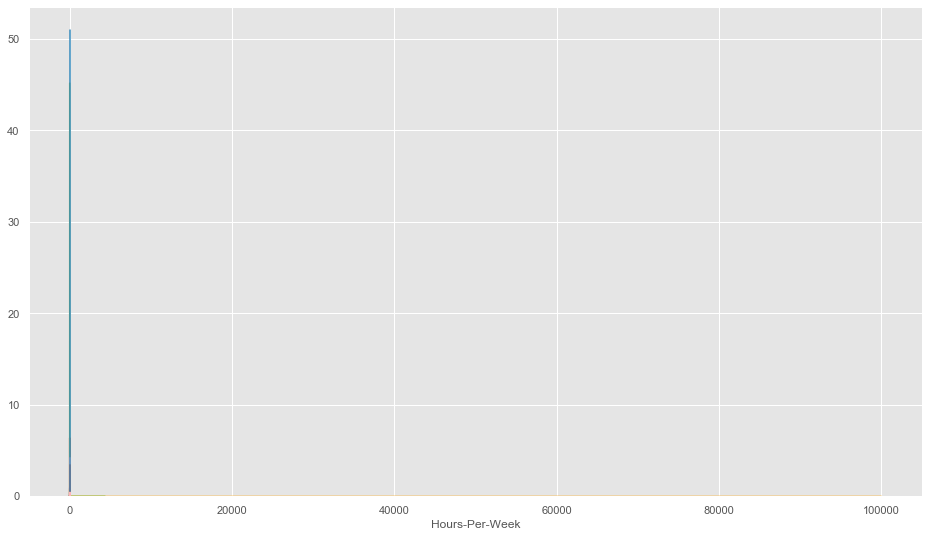

In [88]:
# Visualizing this data:
plot_workclass = sns.distplot(df["Workclass"])
plot_education = sns.distplot(df["Education"])
plot_maritialstatus = sns.distplot(df["Maritial-Status"])
plot_occupation = sns.distplot(df["Occupation"])
plot_relationship = sns.distplot(df["Relationship"])
plot_race = sns.distplot(df["Race"])
plot_sex = sns.distplot(df["Sex"])
plot_nativecountry = sns.distplot(df["Native-Country"])
plot_income = sns.distplot(df["Income"])
plot_age = sns.distplot(df["Age"])
# ignoring weight for now: plot_fnlwgt = sns.distplot(df["Fnlwgt"])
plot_education_num = sns.distplot(df["Education-Num"])
plot_capital_gain = sns.distplot(df["Capital-Gain"])
plot_capital_loss = sns.distplot(df["Capital-Loss"])
pot_hours_per_week = sns.distplot(df["Hours-Per-Week"])

We can tell, from the means, variances, and the plot the data is not scaled.

The dataset needs to be scaled before we can perform any clustering on it.

#### Performing PCA on the dataset:

In [89]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
X.head()

,Workclass,Education,Maritial-Status,Occupation,Relationship,Race,Sex,Native-Country,Income,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
0,1.463883,-0.335443,-0.406183,-0.608434,-0.900177,0.393675,0.703087,0.291573,-0.56321,0.837097,-1.008742,1.134779,-0.145914,-0.216663,-2.22212
1,0.090121,0.181319,-1.734026,-0.135480,-0.277810,0.393675,0.703087,0.291573,-0.56321,-0.042640,0.245046,-0.420027,-0.145914,-0.216663,-0.03543
2,0.090121,-2.402489,-0.406183,-0.135480,-0.900177,-1.962583,0.703087,0.291573,-0.56321,1.057031,0.425770,-1.197429,-0.145914,-0.216663,-0.03543
3,0.090121,-0.335443,-0.406183,0.810427,2.211658,-1.962583,-1.422298,-4.054157,-0.56321,-0.775755,1.408146,1.134779,-0.145914,-0.216663,-0.03543
4,0.090121,0.439700,-0.406183,-0.608434,2.211658,0.393675,-1.422298,0.291573,-0.56321,-0.115952,0.898170,1.523480,-0.145914,-0.216663,-0.03543


In [90]:
# without scaling:
PCA().fit(df).components_.T

array([[-2.28786050e-07,  6.66961444e-06,  4.75310378e-05,
         3.59559981e-03,  1.64000690e-02,  1.65083529e-03,
         9.29924224e-02, -1.07946969e-02,  1.74536709e-02,
        -2.44131008e-01,  4.53850497e-01,  8.50784944e-01,
         3.39737090e-02, -3.82277676e-03,  7.90979566e-03],
       [-1.03242989e-06,  1.57519676e-05,  1.67425501e-04,
        -5.83314948e-04,  2.01203756e-02, -4.28298057e-02,
        -5.55204100e-02, -9.40734639e-01,  3.30585402e-01,
        -7.47726924e-03, -1.71465074e-02, -5.90230593e-03,
        -1.01322365e-03,  4.66025218e-03,  1.42491218e-03],
       [ 4.02193665e-07, -8.85276595e-06, -1.32081562e-04,
        -3.29300323e-02, -1.26644630e-02,  5.17488333e-03,
        -7.10641373e-04,  1.37447518e-02,  2.12202459e-02,
         4.41190536e-01, -7.30354081e-01,  5.17760011e-01,
        -3.46798782e-02,  2.36453922e-02,  1.36126970e-02],
       [ 6.22482975e-08,  1.46060644e-05,  1.97598380e-04,
        -1.05440630e-03,  3.30148924e-02,  9.30852286

In [91]:
# with scaling:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
PCA().fit(X).components_.T

array([[ 1.66579541e-01, -1.30880929e-02, -5.68627493e-01,
        -9.84735809e-02, -3.31489711e-01, -9.63945657e-04,
        -8.30504519e-03,  1.55750320e-01,  3.62146696e-02,
         8.11231183e-02,  5.78339908e-01, -2.68994679e-01,
        -2.97867422e-01, -3.65419742e-02, -6.65025345e-03],
       [ 1.16674806e-01,  5.48220772e-01,  1.42476371e-02,
        -8.60189606e-02,  2.41707436e-01, -7.55468215e-02,
        -3.93702308e-01,  1.45971918e-01, -1.64320836e-01,
         1.10339344e-01,  3.23969328e-01,  1.64303109e-01,
         3.01172519e-01,  4.18017821e-01, -3.50438740e-02],
       [-2.94072052e-01,  6.22252016e-02, -2.43687569e-01,
        -4.22290477e-03,  3.46025542e-01,  9.58990787e-03,
         1.23103685e-01, -5.37778527e-01, -1.66453799e-01,
         2.35097292e-02,  4.83558000e-02, -5.82082180e-01,
         2.26158176e-01,  7.16344776e-02,  1.91244156e-02],
       [ 1.40603478e-01,  2.75304668e-02, -6.07455597e-01,
        -7.10879062e-04, -2.64332415e-01, -3.55199552

In [92]:
X.mean()

Workclass          4.317185e-16
Education          1.326890e-15
Maritial-Status    2.128178e-16
Occupation        -2.183893e-16
Relationship      -3.435963e-16
Race               2.071831e-15
Sex               -2.825340e-16
Native-Country    -7.107678e-17
Income             1.073998e-15
Age                1.224314e-16
Fnlwgt            -6.205451e-17
Education-Num     -7.645058e-17
Capital-Gain       6.867425e-16
Capital-Loss       1.481258e-16
Hours-Per-Week     7.912677e-16
dtype: float64

In [93]:
X.var()

Workclass          1.000031
Education          1.000031
Maritial-Status    1.000031
Occupation         1.000031
Relationship       1.000031
Race               1.000031
Sex                1.000031
Native-Country     1.000031
Income             1.000031
Age                1.000031
Fnlwgt             1.000031
Education-Num      1.000031
Capital-Gain       1.000031
Capital-Loss       1.000031
Hours-Per-Week     1.000031
dtype: float64

Now it is clear that the data set is scaled.

In [94]:
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15'])
pca_loadings

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
Workclass,0.166580,-0.013088,-0.568627,-0.098474,-0.331490,-0.000964,-0.008305,0.155750,0.036215,0.081123,0.578340,-0.268995,-0.297867,-0.036542,-0.006650
Education,0.116675,0.548221,0.014248,-0.086019,0.241707,-0.075547,-0.393702,0.145972,-0.164321,0.110339,0.323969,0.164303,0.301173,0.418018,-0.035044
Maritial-Status,-0.294072,0.062225,-0.243688,-0.004223,0.346026,0.009590,0.123104,-0.537779,-0.166454,0.023510,0.048356,-0.582082,0.226158,0.071634,0.019124
Occupation,0.140603,0.027530,-0.607456,-0.000711,-0.264332,-0.035520,0.130866,-0.010727,-0.337435,-0.131747,-0.444723,0.263264,0.329080,0.124316,-0.006457
Relationship,-0.447879,0.318695,-0.024211,0.069449,-0.234322,0.018542,0.167962,0.153671,0.220390,0.023995,-0.082051,-0.017268,-0.057107,0.215410,0.692468
Race,0.133605,-0.026468,0.048117,-0.604343,0.058413,0.141072,0.322150,0.100159,0.033538,0.666518,-0.131370,-0.022332,0.111401,0.002102,0.035150
Sex,0.387485,-0.375867,-0.089452,-0.067770,0.359343,0.005080,-0.148219,-0.214180,-0.097415,-0.058982,0.091154,0.194938,-0.132804,0.081944,0.644484
Native-Country,0.035582,0.154022,0.118980,-0.645494,0.002287,0.132029,0.177776,0.019555,-0.001835,-0.698266,0.065694,-0.051584,-0.014325,-0.002257,0.001603
Income,0.415881,0.191301,0.118390,0.189672,0.003269,0.035708,0.272698,-0.076643,-0.009455,-0.016207,-0.249437,-0.240118,-0.455063,0.561654,-0.127144
Age,0.274946,-0.114011,0.403087,0.116995,-0.400546,-0.020327,0.003176,0.142882,-0.406446,-0.017166,0.093766,-0.418629,0.377915,-0.051139,0.242887


In [95]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['Workclass', 'Education', 'Maritial-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-Country', 'Income', 'Age', 'Fnlwgt', 'Education-Num', 'Capital-Gain', 'Capital-Loss', 'Houts-Per-Week'], index=X.index)
df_plot.head()

,Workclass,Education,Maritial-Status,Occupation,Relationship,Race,Sex,Native-Country,Income,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Houts-Per-Week
0,0.505231,-0.213030,0.272255,-0.983892,-0.860677,-0.002681,-0.453416,-0.498762,-1.895610,0.544314,1.318415,0.075884,-1.525169,-1.453717,0.231552
1,0.554889,-0.742675,0.343895,-0.642631,-0.123040,0.170362,-0.471048,1.103347,0.162984,-0.014875,0.287429,1.194687,-0.175444,-0.096959,0.227375
2,-0.084547,-2.803941,0.347059,1.083948,-0.732178,0.075054,-0.031038,-0.025250,-0.222554,-1.931096,0.159806,-0.338914,-0.285082,-0.784110,-0.028752
3,-2.006328,0.925007,-1.600155,4.214093,-0.428020,-0.580430,-0.485290,1.463923,0.337404,1.432556,-0.969528,0.421974,-0.299942,-0.752821,0.603524
4,-1.340735,2.119320,0.216358,-0.102657,-0.193268,0.213997,0.350718,1.657521,0.511019,0.308239,-0.160349,-0.361202,-0.205535,-0.870807,0.897770


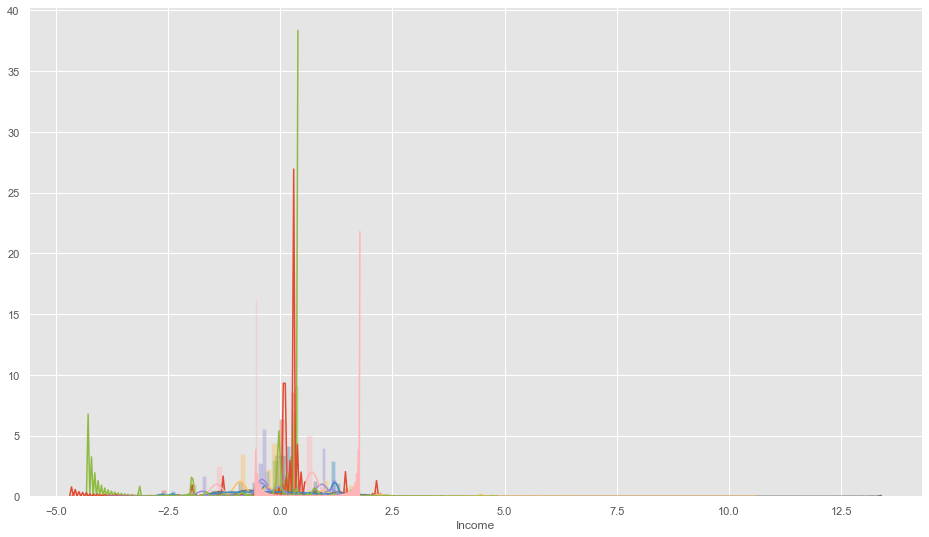

In [96]:
# Visualizing the scaled data:
lot_workclass = sns.distplot(X["Workclass"])
plot_education = sns.distplot(X["Education"])
plot_maritialstatus = sns.distplot(X["Maritial-Status"])
plot_occupation = sns.distplot(X["Occupation"])
plot_relationship = sns.distplot(X["Relationship"])
plot_race = sns.distplot(X["Race"])
plot_sex = sns.distplot(X["Sex"])
plot_nativecountry = sns.distplot(X["Native-Country"])
# we make the last on income for the x axis: plot_income = sns.distplot(X["Income"])
plot_age = sns.distplot(X["Age"])
# ignoring weight for now: plot_fnlwgt = sns.distplot(X["Fnlwgt"])
plot_education_num = sns.distplot(X["Education-Num"])
plot_capital_gain = sns.distplot(X["Capital-Gain"])
plot_capital_loss = sns.distplot(X["Capital-Loss"])
pot_hours_per_week = sns.distplot(X["Hours-Per-Week"])
plot_income = sns.distplot(X["Income"])

[(0, 420)]

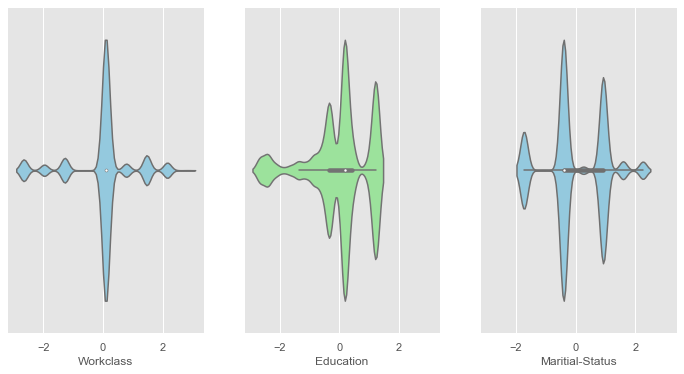

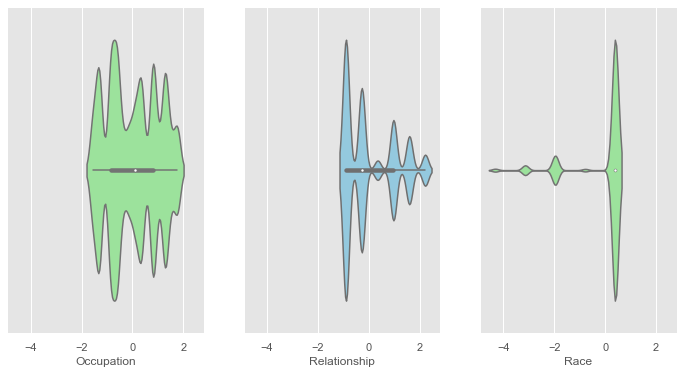

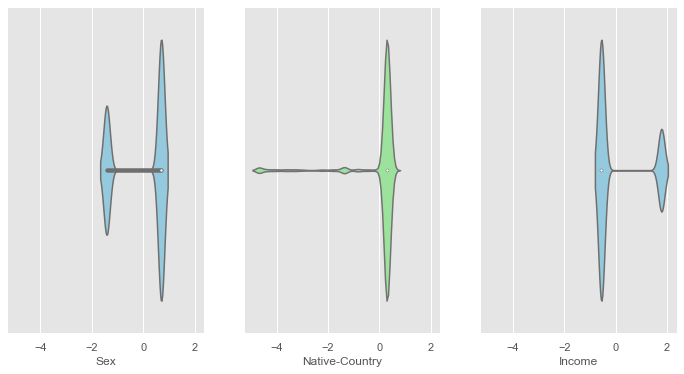

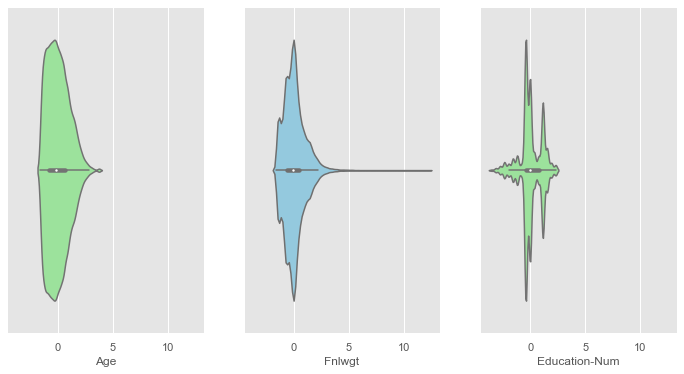

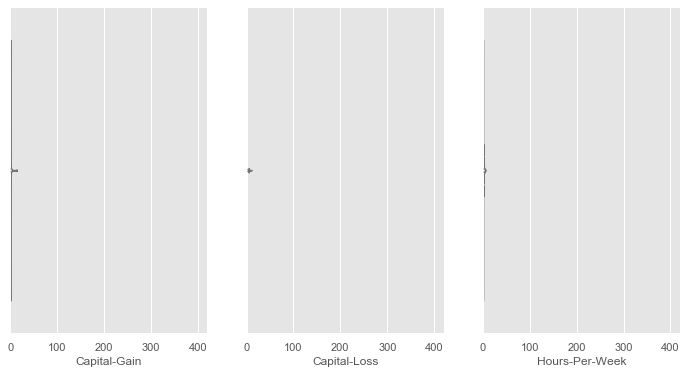

In [99]:
f, axes = plt.subplots(1,3, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=X, x='Workclass', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=X, x='Education',color="lightgreen", ax=axes[1])
v3 = sns.violinplot(data=X, x='Maritial-Status', color="skyblue",ax=axes[2])
f, axes = plt.subplots(1,3, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=X, x='Occupation',color="lightgreen", ax=axes[0])
v2 = sns.violinplot(data=X, x='Relationship', color="skyblue",ax=axes[1])
v3 = sns.violinplot(data=X, x='Race',color="lightgreen", ax=axes[2])
f, axes = plt.subplots(1,3, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=X, x='Sex', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=X, x='Native-Country',color="lightgreen", ax=axes[1])
v3 = sns.violinplot(data=X, x='Income', color="skyblue",ax=axes[2])
f, axes = plt.subplots(1,3, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=X, x='Age',color="lightgreen", ax=axes[0])
v2 = sns.violinplot(data=X, x='Fnlwgt', color="skyblue",ax=axes[1])
v3 = sns.violinplot(data=X, x='Education-Num',color="lightgreen", ax=axes[2])
f, axes = plt.subplots(1,3, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=X, x='Capital-Gain', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=X, x='Capital-Loss',color="lightgreen", ax=axes[1])
v3 = sns.violinplot(data=X, x='Hours-Per-Week',color="lightgreen", ax=axes[2])
v1.set(xlim=(0,420))

In [ ]:
# Plotting the values to understand the spread
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='black', s=100)

# x and y given as array_like objects
import plotly.express as px
fig = px.scatter(x=Income, y=Spend)
fig.show()